#Import Data From Keggle and Unzip That

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:14<00:00, 31.4MB/s]
100% 1.06G/1.06G [00:14<00:00, 77.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#Now, CNN Work!!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


#Generators

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode='int', #cat=0 dog=1
    batch_size=32,
    image_size=(256,256) #all images are equal size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int', #cat=0 dog=1
    batch_size=32,
    image_size=(256,256)
)

#return as numpy array 0 - 255 format

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#Normalize

### 0 - 1 scale

In [ ]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image, label

train_ds = train_ds.map(process) #map_fun --> everytime pull one image and push to process function for reducing -->process() -->and store into train_ds
validation_ds = validation_ds.map(process)

#Create CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 56s 85ms/step - loss: 0.6878 - accuracy: 0.5424 - val_loss: 0.7034 - val_accuracy: 0.5616
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.6594 - accuracy: 0.6115 - val_loss: 0.5849 - val_accuracy: 0.6846
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.5256 - accuracy: 0.7329 - val_loss: 0.4434 - val_accuracy: 0.8012
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4206 - accuracy: 0.8062 - val_loss: 0.3895 - val_accuracy: 0.8234
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3259 - accuracy: 0.8565 - val_loss: 0.3685 - val_accuracy: 0.8392
Epoch 6/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2308 - accuracy: 0.9040 - val_loss: 0.4175 - val_accuracy: 0.8388
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1473 - accuracy: 0.9417 - val_loss: 0.5418 - val_accuracy:

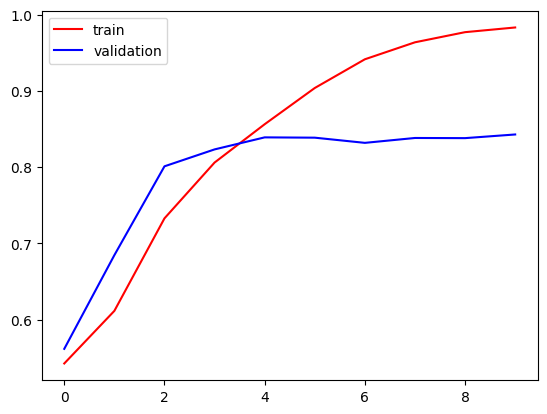

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


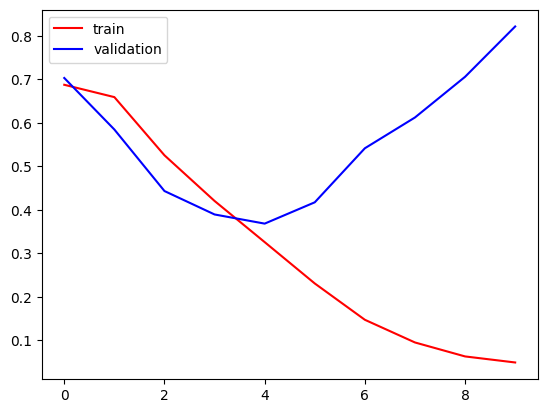

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#Way to reduce overfitting

#Add more data
#Data Augmentation
#L1 / L2 Regualarization
#Dorpout
#Batch Normalization
#Reduce Model Complexity